# Diluted Unitary Fitting

In [1]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm
from math import ceil

from loss_functions import *
from optimization import *
from quantum_channel import *
from kraus_channels import *
from quantum_tools import *
from experimental import *
from spam import *
from scipy.stats import gaussian_kde
from quantum_circuits import *
from analysis import *
from utils import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
def optimize_annulus_distance(spectrum_target, U, rank_grid): 
    
    model_list = []
    for rank in tqdm(rank_grid): 
        model = ModelQuantumMap(channel = DilutedKrausMap(U=U, 
                                                          c=0.5, 
                                                          kraus_part=KrausMap(d, 
                                                                              rank=rank, 
                                                                              trainable=False),
                                                     ),
                            loss_function = AnnulusDistance(),
                            optimizer = tf.optimizers.Adam(learning_rate=0.01),
                            logger = Logger(loss_function = AnnulusDistance(), 
                                            verbose=True,),
                            )
        model.train(inputs = None,
                    targets = [spectrum_target],
                    num_iter = 500,
                    
                   )

        model_list.append(model)

    distance_list = [model.logger.loss_train_list[-1] for model in model_list]
    
    idx_best = np.argmin(distance_list)
    if (idx_best == 0) or (idx_best == len(rank_grid)-1):
        print("minimum at edge of range")
        print(distance_list)

    distance_best = distance_list[idx_best]
    model_best = model_list[idx_best]

    return distance_best, model_best

## Three Qubits

In [3]:
[channel_list1, channel_list2, channel_list3, channel_list4, channel_list5, channel_list6, channel_list7] = pickle.load(open("../../data/channel_fullRank_belem_longTrain.p", "rb"))

spectrum_target_list1 = [channel_spectrum(channel) for channel in channel_list1]
spectrum_target_list2 = [channel_spectrum(channel) for channel in channel_list2]
spectrum_target_list3 = [channel_spectrum(channel) for channel in channel_list3]
spectrum_target_list4 = [channel_spectrum(channel) for channel in channel_list4]
spectrum_target_list5 = [channel_spectrum(channel) for channel in channel_list5]
spectrum_target_list6 = [channel_spectrum(channel) for channel in channel_list6]
spectrum_target_list7 = [channel_spectrum(channel) for channel in channel_list7]

In [5]:
n = 3
d = 2**n

rank_grid = np.arange(5, 15)

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
rng = np.random.default_rng(seed=42)

distance_best_list1 = []
model_best_list1 = []
for spectrum_target in spectrum_target_list1:
    U = generate_haar_random(d, rng) 
    distance_best, model_best = optimize_annulus_distance(spectrum_target, U, rank_grid)
    distance_best_list1.append(distance_best)
    model_best_list1.append(model_best)
    
for model in model_best_list1:
    model.optimizer = None

saver([distance_best_list1, model_best_list1], data_path("diluted_fitting_8layer.model"))

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.21499298643355788 None
0.0023922485273405875 None
0.0017229716633537717 None
0.0016279981521071579 None
0.001683395591151691 None
0.0016592911933071928 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.20993500993534794 None
0.0033230778490391747 None
0.0011291644109934396 None
0.0012637110948241837 None
0.0011508662462277601 None
0.0011361041843842125 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.21196460978344747 None
0.00266376314114811 None
0.0018893682149341234 None
0.0022681444367356417 None
0.00242877175524451 None
0.0023361297065645718 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.21006765803460625 None
0.003548406770956068 None
0.001017945589219625 None
0.0010892005785307778 None
0.0015485948470784002 None
0.0010880246104428858 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2078650414817227 None
0.0033249703047374566 None
0.0009395879223500108 None
0.0010795920557568738 None
0.0006132909988932033 None
0.0006502319596429359 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.21313957825717644 None
0.0024289421774297683 None
0.0003293864322768916 None
0.000448399378873969 None
0.00021615919313447892 None
0.0003569593545335638 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.20934204246170476 None
0.004315392047885918 None
0.0017528066158578738 None
0.0014038037726205096 None
0.0014560955657317402 None
0.0015320530849961779 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2106616434044583 None
0.0025800043415110203 None
0.001049822242603203 None
0.000761841824080802 None
0.0009715676484745028 None
0.0013743727079465102 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.20286191532458697 None
0.0024318270936686103 None
0.0015323341812405237 None
0.0011544665752849796 None
0.0011921848496529964 None
0.0014926370205095491 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.20630196509567633 None
0.0025423908871995194 None
0.0011676785034773279 None
0.0009500690377496813 None
0.0008660292443885153 None
0.0007515298644597375 None


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.25134134620911436 None
0.025162857983761572 None
0.020042818317331956 None
0.01997974491984773 None
0.020508999759501163 None
0.019955902470228062 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2528672491318139 None
0.025386034960892704 None
0.019838607709506576 None
0.019491027685305976 None
0.020024803129671424 None
0.01942738801755578 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.24197947625104085 None
0.023010086547071932 None
0.018593085597233876 None
0.018408729288759144 None
0.01888910226204506 None
0.018544515323064396 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.24680164871012758 None
0.023388601702795678 None
0.018427311736663128 None
0.01834814236588587 None
0.018390655158466572 None
0.018729240329156672 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.24969993686931763 None
0.02398665072640643 None
0.018682514588354876 None
0.01847803737361437 None
0.018373908308243966 None
0.01859880811546301 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.24507572318222212 None
0.022656432733787122 None
0.01875132790790615 None
0.01865124171908211 None
0.01876345345458131 None
0.01890283057370419 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.24955185809605532 None
0.024507124506483315 None
0.01864176955782488 None
0.018568538093397355 None
0.018522778601214242 None
0.018697417450956433 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.24688134052844507 None
0.023713939872171283 None
0.01865221276263709 None
0.018499622416508887 None
0.018495588870464284 None
0.018618633778298192 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.24503698779711652 None
0.02312102829104257 None
0.018451632027590262 None
0.018807114930700385 None
0.019145339059789636 None
0.018541233537647795 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.24726623903222927 None
0.02232751741108517 None
0.017981406704672194 None
0.01814932258973592 None
0.017925573188012797 None
0.017831751349902517 None
minimum at edge of range
[0.019955902470228062, 0.01942738801755578, 0.018544515323064396, 0.018729240329156672, 0.01859880811546301, 0.01890283057370419, 0.018697417450956433, 0.018618633778298192, 0.018541233537647795, 0.017831751349902517]


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.2535341455409761 None
0.010425911886598504 None
0.006170776802051075 None
0.006025727548704613 None
0.006096412115050463 None
0.006226584360796996 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.23595177581986118 None
0.009767881801902495 None
0.004378020234232664 None
0.004597970900990825 None
0.004392977318435227 None
0.004362922468048506 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2438663506639551 None
0.008148831102124936 None
0.004358488618500452 None
0.003844159451400356 None
0.004135861829901658 None
0.004225685488752368 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2455407004323536 None
0.008152954284470205 None
0.003696926978996099 None
0.0032773027601490897 None
0.0035528356725875393 None
0.003364628651670822 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2499935801033994 None
0.008710798728937584 None
0.004286721126434663 None
0.004305558817943209 None
0.00404945105807992 None
0.003960296195001387 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.23063573655746775 None
0.006648419239305704 None
0.00314060324897268 None
0.003189582339050028 None
0.0033208875999953466 None
0.003034400532918466 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.22231673867417598 None
0.007186997370365476 None
0.003250770578660439 None
0.003367422696625445 None
0.003309959874064748 None
0.0036179949280878447 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.22671325104990958 None
0.005031402755961976 None
0.002504780879913726 None
0.002864455327042798 None
0.0027102856638450937 None
0.002598620344012601 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.22770642206334993 None
0.007859939185423994 None
0.0035391584556219626 None
0.0032301586443068114 None
0.003571163873419312 None
0.0033959679250271037 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2246341863253602 None
0.007094688046177593 None
0.003515111188267544 None
0.0030585511194586774 None
0.0029441260671449663 None
0.0029515699966651413 None


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.23853267794327138 None
0.0060500835139231995 None
0.0035564569541286385 None
0.0034576552093712144 None
0.003633880647940519 None
0.0036086054449974204 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2216976803506086 None
0.0027561582435851953 None
0.0018507139833333353 None
0.0019092461690406776 None
0.0018443825704260218 None
0.0019806725796239757 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2265588167882054 None
0.006163744803265571 None
0.0025451701073664146 None
0.002454101846517565 None
0.0025994136409185353 None
0.002520743550568707 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2181341937467084 None
0.0046143673432769575 None
0.0020795826702372446 None
0.002060437273189477 None
0.0019956799150211988 None
0.0019331784919602354 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.21718790869944904 None
0.0016257990660241014 None
0.0011108385661839524 None
0.001025319521520213 None
0.0010295667705035815 None
0.0009127407976403539 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2191456464261726 None
0.002134040152089187 None
0.0011934472515868577 None
0.0012474861693322263 None
0.001072286986215541 None
0.0010886619742037922 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.22166497936827034 None
0.0011071776341663973 None
0.0014111636933392643 None
0.0010865366095942786 None
0.0011949442929140733 None
0.00109303609133251 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2281703561107109 None
0.0016321063685075764 None
0.0008918645840840689 None
0.0005333060094795048 None
0.00015132390819257854 None
0.0002883459659763079 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.21702185324599088 None
0.0017713049663990324 None
0.0016899604558941541 None
0.0014129814921515194 None
0.001566522090335473 None
0.001832209864015451 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.21755442021676044 None
0.0010448333375040367 None
0.0009206114293707961 None
0.0010879738016632062 None
0.0008086973773188347 None
0.0008649376916324264 None


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.24049849897661285 None
0.008018427680203485 None
0.0022404887585580294 None
0.002164622611209588 None
0.0018668307483320314 None
0.00219831563572613 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.23724920942731215 None
0.006871382169430142 None
0.001565750083115062 None
0.0019701328819856654 None
0.0014453420097609818 None
0.001431572816931504 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2370095288697149 None
0.006300837955992212 None
0.0013699879389188737 None
0.0014608955607120825 None
0.0017901452124989823 None
0.0013739209264518005 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.24012331923039032 None
0.006597075321640188 None
0.001629927722520082 None
0.001935626614276649 None
0.0018785022733959998 None
0.0019695437505400162 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.23930864466668328 None
0.006987627393632452 None
0.0014124675505615505 None
0.0013004775898125295 None
0.0014838467531160886 None
0.0014107764071084952 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2350378320513312 None
0.0058850937335014255 None
0.0010153584766919854 None
0.0016111832215375467 None
0.0014621861307329194 None
0.0010861814724441516 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.23317877374788834 None
0.0069667885966224 None
0.0011829261095529845 None
0.001066481757975567 None
0.0010699934647061746 None
0.0014584760553484014 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.23542357627502827 None
0.006524508586134361 None
0.0013344216482369994 None
0.0014627550422605141 None
0.0014396677175308697 None
0.0014995270303865445 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.23057767354130898 None
0.006684554238430626 None
0.0014548008747110354 None
0.0014247146947435202 None
0.0017116886076655067 None
0.0017038973416996376 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.23417105421821566 None
0.007444594186943894 None
0.001044925338545128 None
0.000992834690356542 None
0.0010278553281174968 None
0.0014413909648164878 None


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.22772958995760498 None
0.0060742574093176314 None
0.004113579745511243 None
0.004981103724463056 None
0.004130887463478652 None
0.004286748655605959 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.21611396752115822 None
0.003293390753705862 None
0.0024500049578285014 None
0.0026982535759775693 None
0.003031151758311923 None
0.002740015138314014 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.21715721567022037 None
0.004088841755904495 None
0.0026488900891376774 None
0.0026915743159115837 None
0.0028897483070743604 None
0.002654799409781094 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2190434993538356 None
0.0031768946540613355 None
0.0022406666731212945 None
0.0026400029278772575 None
0.0021478597863821875 None
0.002114490685433264 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.21133457546126194 None
0.00346787678472885 None
0.0023081948822609726 None
0.002453312292294523 None
0.0025044978117470906 None
0.002763387642945286 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.21687299037753574 None
0.0021501880125169154 None
0.001577981587826926 None
0.0016931181176536721 None
0.00171939482303733 None
0.0019213890468288352 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2165989504432539 None
0.0041311533105577725 None
0.002672580852910332 None
0.0028528534221279873 None
0.0029998329965537844 None
0.002643751387352719 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2135767124737918 None
0.003769461061903968 None
0.00231905090685786 None
0.0023797758662274467 None
0.0020906671314800725 None
0.0022990331503897317 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2356798431842037 None
0.003207395481035581 None
0.0024545193163102302 None
0.002921033822479456 None
0.002721227646692345 None
0.0028019441918546305 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2198617972674592 None
0.003575249754931807 None
0.002934855967179901 None
0.0027455110819644144 None
0.0027438354555261654 None
0.0026381156317402815 None


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.24870017009833412 None
0.011326987096251954 None
0.006023509698771003 None
0.0058056864887568345 None
0.005738668866066279 None
0.005717801175018298 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.24146125180702818 None
0.010615395163181824 None
0.0064148792855194155 None
0.006017653016199723 None
0.006151488056398887 None
0.00627037484690608 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.23241898737757555 None
0.009905885828994886 None
0.004757929785695757 None
0.004442621343970365 None
0.004260583608570114 None
0.004585668081851646 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.241027299374487 None
0.00975578890300077 None
0.003983620404447255 None
0.004009389010662205 None
0.004568734651908778 None
0.004127094340322785 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.24299063719703246 None
0.009879453893148654 None
0.0046980554421183745 None
0.0049993543261492145 None
0.005421820825902473 None
0.004990599818536609 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.23609050177567517 None
0.009955416943303801 None
0.0042169028758551625 None
0.004715170248663058 None
0.003958938899012459 None
0.004125426907572926 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.23725415598057045 None
0.00868413942426412 None
0.003723115966163759 None
0.003850604725118401 None
0.004071036822721015 None
0.0036428738827429135 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.23924144964281413 None
0.01029031123063907 None
0.004613447192375547 None
0.004110562859463183 None
0.004519280858449344 None
0.004151405088673186 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2364843039015243 None
0.010199598699156672 None
0.003749937475737661 None
0.004019901725236846 None
0.0035685266613111866 None
0.0036879435134702806 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.23599146257910858 None
0.00885921175788388 None
0.004071590583582673 None
0.003841022704532338 None
0.0038890224478702966 None
0.003915020568856587 None


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.2349931153745264 None
0.012043547468830795 None
0.007504945805455708 None
0.007899690133967727 None
0.007616668573254055 None
0.007861148910845937 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.23424370140809236 None
0.011997892326837564 None
0.007783331227164245 None
0.00744261436364773 None
0.008074154561754074 None
0.008014225232997583 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.23519275352237273 None
0.011612584840624097 None
0.006481043769754237 None
0.00705145985018012 None
0.006738290237958129 None
0.006616260775269412 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.23536686599577472 None
0.011059032474642818 None
0.0061402492263898795 None
0.006075294795143354 None
0.006516350569933792 None
0.00662251937666454 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.23430955690200944 None
0.011594173157627348 None
0.00702108883907937 None
0.006228527198662324 None
0.006615130185342434 None
0.0063532337574637695 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2368515883232532 None
0.011395194564779096 None
0.007059594270831651 None
0.006616589048519081 None
0.006674218249942435 None
0.006553871295014384 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2279299286764406 None
0.00862642569392058 None
0.005480579037814062 None
0.00527077941357192 None
0.005263634533459286 None
0.00581009320536689 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.22715042207672753 None
0.007711044395102578 None
0.006136839449822029 None
0.005838565810675324 None
0.00552071099246387 None
0.0059350908314881965 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.23324910239766358 None
0.009993760337800271 None
0.006561380175548841 None
0.006375714510917319 None
0.006553941006255002 None
0.006499109279966263 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.22279332000325786 None
0.005942773684285051 None
0.005406242381865348 None
0.005391407275256245 None
0.005299350914800185 None
0.005397413719718418 None
minimum at edge of range
[0.007861148910845937, 0.008014225232997583, 0.006616260775269412, 0.00662251937666454, 0.0063532337574637695, 0.006553871295014384, 0.00581009320536689, 0.0059350908314881965, 0.006499109279966263, 0.005397413719718418]


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.24960390915896466 None
0.010804888377367117 None
0.006248394580236096 None
0.00584861656863552 None
0.005894055005647743 None
0.006302083367764535 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.23621090162020603 None
0.02792932911387917 None
0.0065268614388792065 None
0.005923044691915557 None
0.006813462468003966 None
0.006123440922926254 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.23615113951394742 None
0.009716935194915566 None
0.0052521754408328385 None
0.004792423945096484 None
0.004975833394467688 None
0.0049731618895410504 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.24455753558315094 None
0.008378011044609585 None
0.020962860068183455 None
0.004509637935421696 None
0.020686872717778523 None
0.004265971200669082 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2457254431532476 None
0.009422046851365365 None
0.004565613806973568 None
0.00481277934880397 None
0.004259003528529617 None
0.004554736893640871 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.23265633806873 None
0.008508046912614396 None
0.003284162883969219 None
0.0038714477584835833 None
0.003339775006323404 None
0.003574591676461212 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.23046152494455016 None
0.0065919818873020775 None
0.0035066352486544166 None
0.0038015860178520697 None
0.0031921724981624853 None
0.0034182201063249775 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.22850108223326865 None
0.008496340359555803 None
0.004235218847399788 None
0.003783198091786505 None
0.0037305153441183573 None
0.003963459963960994 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2293868410405138 None
0.0074787076561961315 None
0.003418930047827542 None
0.0035154709605737956 None
0.003306663467218565 None
0.003535922004722533 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2315732864171548 None
0.008566468273847482 None
0.019703657011741958 None
0.00323882003218899 None
0.019495365560171195 None
0.01993222999944465 None


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.22639997661808384 None
0.007416531604000285 None
0.0033996210144587244 None
0.003461770272400813 None
0.0035684154022548567 None
0.003400713992751956 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.22676526376413927 None
0.006028159240940039 None
0.0021439118648758837 None
0.002433614192758903 None
0.00250443534381396 None
0.002350401901558129 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.22045060223765592 None
0.004669561766427537 None
0.0027315228446679225 None
0.0025940234862540977 None
0.002442071044356693 None
0.0026033248943073163 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.22434304744899117 None
0.0042225377917576145 None
0.0011303108854753435 None
0.0015960421001950946 None
0.0013225164279623237 None
0.0011377441951249039 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.22112324230117097 None
0.006406824421035339 None
0.0023298114741478813 None
0.0024456523137971076 None
0.002339348056188641 None
0.0020667450332886405 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2223984830506914 None
0.002657529351639881 None
0.0013747076678846898 None
0.001615642682618241 None
0.0020378342838037883 None
0.001494643249894571 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2199440675429441 None
0.003169458032518549 None
0.002044544268641671 None
0.0018815773052247337 None
0.001883688594730888 None
0.0018487594362690033 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.21846746880778836 None
0.0014976321113678278 None
0.0016648111240077127 None
0.0015097101164571435 None
0.0013005614871822474 None
0.0020754242524899727 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.21886866668615268 None
0.0024306741338144602 None
0.0012276542656508211 None
0.0011999530858701696 None
0.0016857233992955446 None
0.001314112023262362 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.22132648781565276 None
0.002095708262519135 None
0.0014853900387798418 None
0.0013610159155204725 None
0.001401613992524794 None
0.0013225359899166676 None


In [ ]:
n = 3
d = 2**n

rank_grid = np.arange(5, 15)

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
rng = np.random.default_rng(seed=42)

distance_best_list2 = []
model_best_list2 = []
for spectrum_target in spectrum_target_list2:
    U = generate_haar_random(d, rng=numpy.random.default_rng()) 
    distance_best, model_best = optimize_annulus_distance(spectrum_target, U, rank_grid)
    distance_best_list1.append(distance_best)
    model_best_list1.append(model_best)
    
for model in model_best_list2:
    model.optimizer = None

saver([distance_best_list2, model_best_list2], data_path(diluted_fitting_8layer.model))

In [27]:
n = 3
d = 2**n

rank_grid = np.arange(10, 20)

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


distance_best_list3 = []
model_best_list3 = []
for spectrum_target, U in zip(spectrum_target_list3, U_list3):
    distance_best, model_best = optimize_annulus_distance(spectrum_target, U, rank_grid)
    distance_best_list3.append(distance_best)
    model_best_list3.append(model_best)
    
for model in model_best_list3:
    model.optimizer = None

with open("../../data/diluted_fitting_24layer.model", "wb") as handle:
    pickle.dump([distance_best_list3, model_best_list3], handle)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [28]:
n = 3
d = 2**n

rank_grid = np.arange(20, 30)

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

distance_best_list4 = []
model_best_list4 = []
for spectrum_target, U in zip(spectrum_target_list4, U_list4):
    distance_best, model_best = optimize_annulus_distance(spectrum_target, U, rank_grid)
    distance_best_list4.append(distance_best)
    model_best_list4.append(model_best)
    
for model in model_best_list4:
    model.optimizer = None

with open("../../data/diluted_fitting_32layer.model", "wb") as handle:
    pickle.dump([distance_best_list4, model_best_list4], handle)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [29]:
n = 3
d = 2**n

rank_grid = np.arange(20, 35)

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

distance_best_list5 = []
model_best_list5 = []
for spectrum_target, U in zip(spectrum_target_list5, U_list5):
    distance_best, model_best = optimize_annulus_distance(spectrum_target, U, rank_grid)
    distance_best_list5.append(distance_best)
    model_best_list5.append(model_best)
    
for model in model_best_list5:
    model.optimizer = None

with open("../../data/diluted_fitting_40layer.model", "wb") as handle:
    pickle.dump([distance_best_list5, model_best_list5], handle)

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

In [30]:
n = 3
d = 2**n

rank_grid = np.arange(40, 64)

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

distance_best_list6 = []
model_best_list6 = []
for spectrum_target, U in zip(spectrum_target_list6, U_list6):
    distance_best, model_best = optimize_annulus_distance(spectrum_target, U, rank_grid)
    distance_best_list6.append(distance_best)
    model_best_list6.append(model_best)
    
for model in model_best_list6:
    model.optimizer = None

with open("../../data/diluted_fitting_48layer.model", "wb") as handle:
    pickle.dump([distance_best_list6, model_best_list6], handle)

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

In [31]:
n = 3
d = 2**n

rank_grid = np.arange(40, 64)

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

distance_best_list7 = []
model_best_list7 = []
for spectrum_target, U in zip(spectrum_target_list7, U_list7):
    distance_best, model_best = optimize_annulus_distance(spectrum_target, U, rank_grid)
    distance_best_list7.append(distance_best)
    model_best_list7.append(model_best)
    
for model in model_best_list7:
    model.optimizer = None

with open("../../data/diluted_fitting_56layer.model", "wb") as handle:
    pickle.dump([distance_best_list7, model_best_list7], handle)

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

In [9]:
[distance_best_list1, model_best_list1] = loader(data_path("diluted_fitting_8layer.model"))
[distance_best_list2, model_best_list2] = loader(data_path("diluted_fitting_16layer.model"))
[distance_best_list3, model_best_list3] = loader(data_path("diluted_fitting_24layer.model"))
[distance_best_list4, model_best_list4] = loader(data_path("diluted_fitting_32layer.model"))
[distance_best_list5, model_best_list5] = loader(data_path("diluted_fitting_40layer.model"))
[distance_best_list6, model_best_list6] = loader(data_path("diluted_fitting_48layer.model"))
[distance_best_list7, model_best_list7] = loader(data_path("diluted_fitting_56layer.model"))

In [10]:
spectrum_diluted_list1 = [channel_spectrum(model.channel, use_coords=True) for model in model_best_list1]
spectrum_diluted_list2 = [channel_spectrum(model.channel, use_coords=True) for model in model_best_list2]
spectrum_diluted_list3 = [channel_spectrum(model.channel, use_coords=True) for model in model_best_list3]
spectrum_diluted_list4 = [channel_spectrum(model.channel, use_coords=True) for model in model_best_list4]
spectrum_diluted_list5 = [channel_spectrum(model.channel, use_coords=True) for model in model_best_list5]
spectrum_diluted_list6 = [channel_spectrum(model.channel, use_coords=True) for model in model_best_list6]
spectrum_diluted_list7 = [channel_spectrum(model.channel, use_coords=True) for model in model_best_list7]

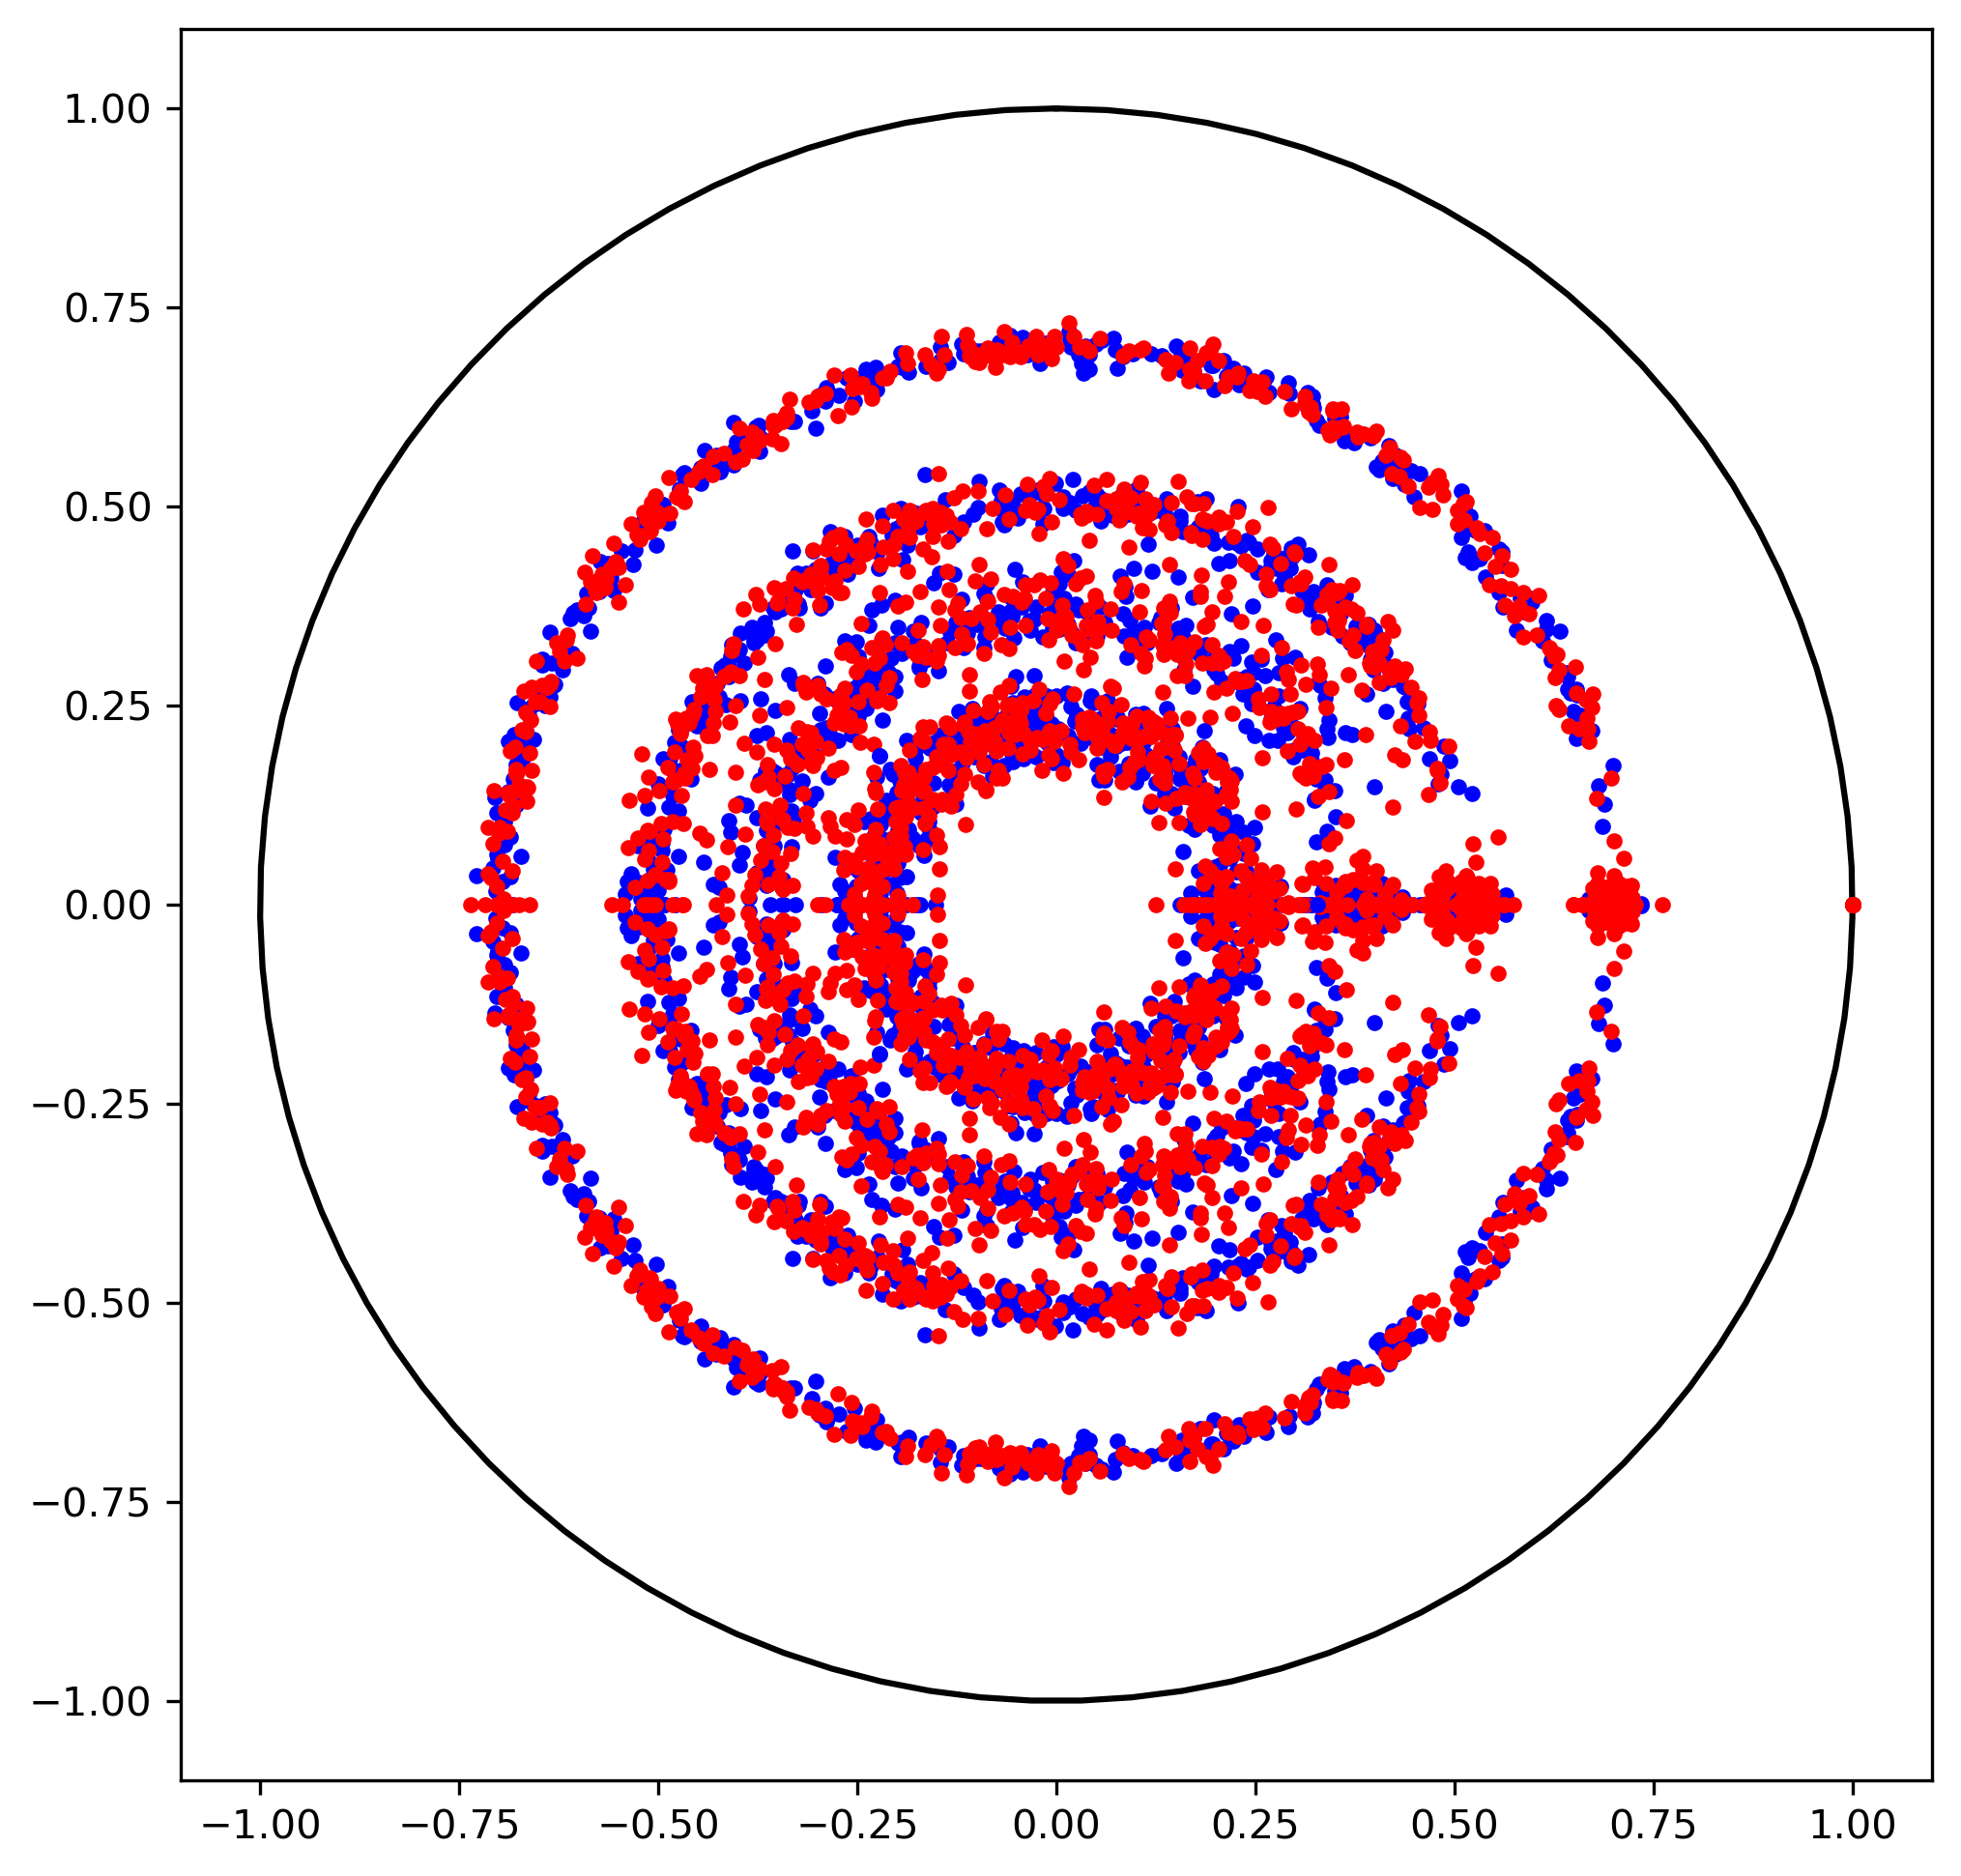

In [11]:
t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]

fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")

for spectrum in spectrum_target_list1:
    plt.plot(spectrum[:,0], spectrum[:,1], "bo", markersize=3)

for spectrum in spectrum_diluted_list1:
    plt.plot(spectrum[:,0], spectrum[:,1], "ro", markersize=3)
    
for spectrum in spectrum_target_list2:
    plt.plot(spectrum[:,0], spectrum[:,1], "bo", markersize=3)

for spectrum in spectrum_diluted_list2:
    plt.plot(spectrum[:,0], spectrum[:,1], "ro", markersize=3)
    
for spectrum in spectrum_target_list3:
    plt.plot(spectrum[:,0], spectrum[:,1], "bo", markersize=3)

for spectrum in spectrum_diluted_list3:
    plt.plot(spectrum[:,0], spectrum[:,1], "ro", markersize=3)

for spectrum in spectrum_target_list4:
    plt.plot(spectrum[:,0], spectrum[:,1], "bo", markersize=3)
    
for spectrum in spectrum_diluted_list4:
    plt.plot(spectrum[:,0], spectrum[:,1], "ro", markersize=3)   
    
plt.show()

In [ ]:
print(f"Mean Error, Std Error, Max Error, Min Error")
print(f"{np.mean(distance_best_list1):.4f}, {np.std(distance_best_list1):.4f}, {np.max(distance_best_list1):.4f}, {np.min(distance_best_list1):.4f}")
print(f"{np.mean(distance_best_list2):.4f}, {np.std(distance_best_list2):.4f}, {np.max(distance_best_list2):.4f}, {np.min(distance_best_list2):.4f}")
print(f"{np.mean(distance_best_list3):.4f}, {np.std(distance_best_list3):.4f}, {np.max(distance_best_list3):.4f}, {np.min(distance_best_list3):.4f}")
print(f"{np.mean(distance_best_list4):.4f}, {np.std(distance_best_list4):.4f}, {np.max(distance_best_list4):.4f}, {np.min(distance_best_list4):.4f}")
print(f"{np.mean(distance_best_list5):.4f}, {np.std(distance_best_list5):.4f}, {np.max(distance_best_list5):.4f}, {np.min(distance_best_list5):.4f}")
print(f"{np.mean(distance_best_list6):.4f}, {np.std(distance_best_list6):.4f}, {np.max(distance_best_list6):.4f}, {np.min(distance_best_list6):.4f}")
print(f"{np.mean(distance_best_list7):.4f}, {np.std(distance_best_list7):.4f}, {np.max(distance_best_list7):.4f}, {np.min(distance_best_list7):.4f}")

In [23]:
print(model_best_list1[0].channel.c, model_best_list1[0].channel.kraus_part.rank)

tf.Tensor(0.6859438526677146, shape=(), dtype=float64) 9


In [5]:
spectrum_list = []

for i in tqdm(range(1000)):
    diluted = DilutedKrausMap(U=generate_unitary(d), c=0.6859438526677146, kraus_part=KrausMap(d, rank=9))
    spectrum = channel_spectrum(diluted, use_coords=True, keep_real=False)
    spectrum_list.append(spectrum)

spectrum = np.real(np.concatenate(spectrum_list))

  0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\krist\anaconda3\envs\env_qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


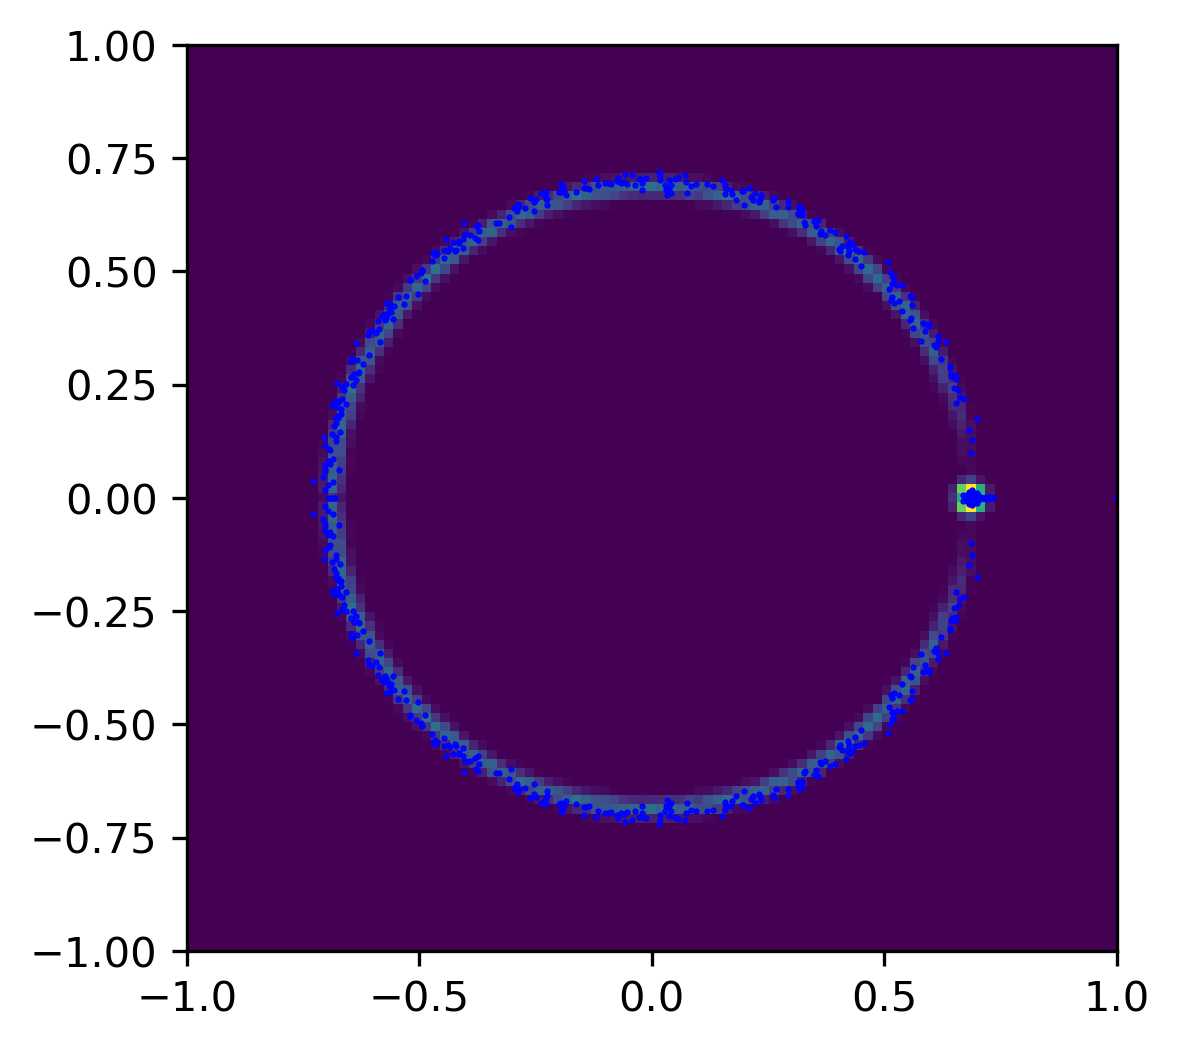

In [6]:
fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.hist2d(spectrum[:,0], spectrum[:,1], bins = np.linspace(-1, 1, 100))
for spectrum_ in spectrum_target_list1:
    plt.plot(spectrum_[:,0], spectrum_[:,1], "bo", markersize=0.5)
plt.show()

In [24]:
print(model_best_list2[0].channel.c, model_best_list2[0].channel.kraus_part.rank)

tf.Tensor(0.5121149722289855, shape=(), dtype=float64) 11


In [20]:
spectrum_list = []

for i in tqdm(range(1000)):
    diluted = DilutedKrausMap(U=generate_unitary(d), c=0.5121149722289855, kraus_part=KrausMap(d, rank=11))
    spectrum = channel_spectrum(diluted, use_coords=True, keep_real=False)
    spectrum_list.append(spectrum)

spectrum = np.real(np.concatenate(spectrum_list))

  0%|          | 0/1000 [00:00<?, ?it/s]

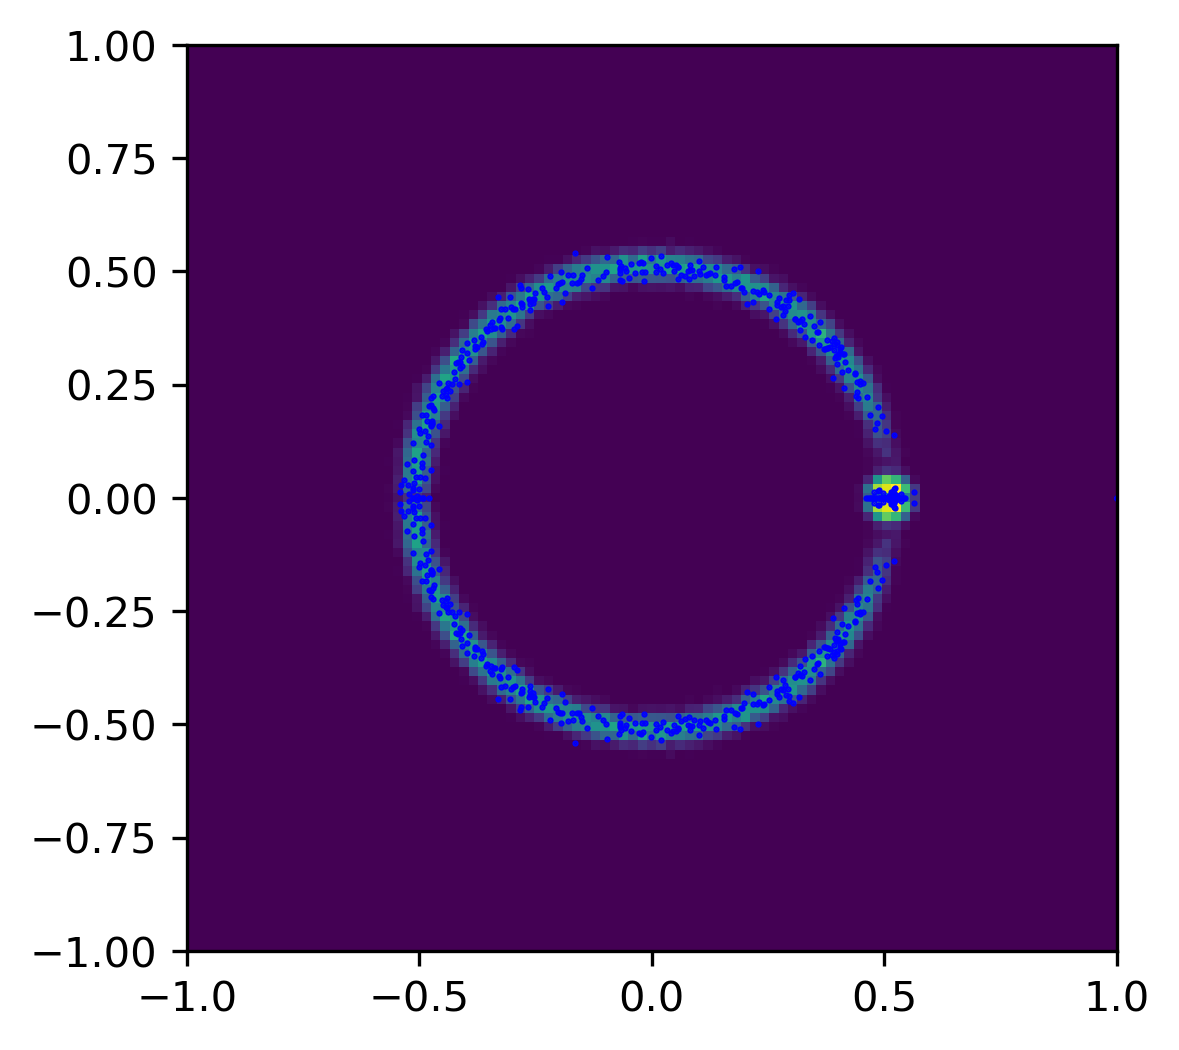

In [21]:
fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.hist2d(spectrum[:,0], spectrum[:,1], bins = np.linspace(-1, 1, 100))
for spectrum_ in spectrum_target_list2:
    plt.plot(spectrum_[:,0], spectrum_[:,1], "bo", markersize=0.5)
plt.show()

In [25]:
print(model_best_list3[0].channel.c, model_best_list3[0].channel.kraus_part.rank)

tf.Tensor(0.37080806353486273, shape=(), dtype=float64) 15


In [26]:
spectrum_list = []

for i in tqdm(range(1000)):
    diluted = DilutedKrausMap(U=generate_unitary(d), c=0.37080806353486273, kraus_part=KrausMap(d, rank=15))
    spectrum = channel_spectrum(diluted, use_coords=True, keep_real=False)
    spectrum_list.append(spectrum)

spectrum = np.real(np.concatenate(spectrum_list))

  0%|          | 0/1000 [00:00<?, ?it/s]

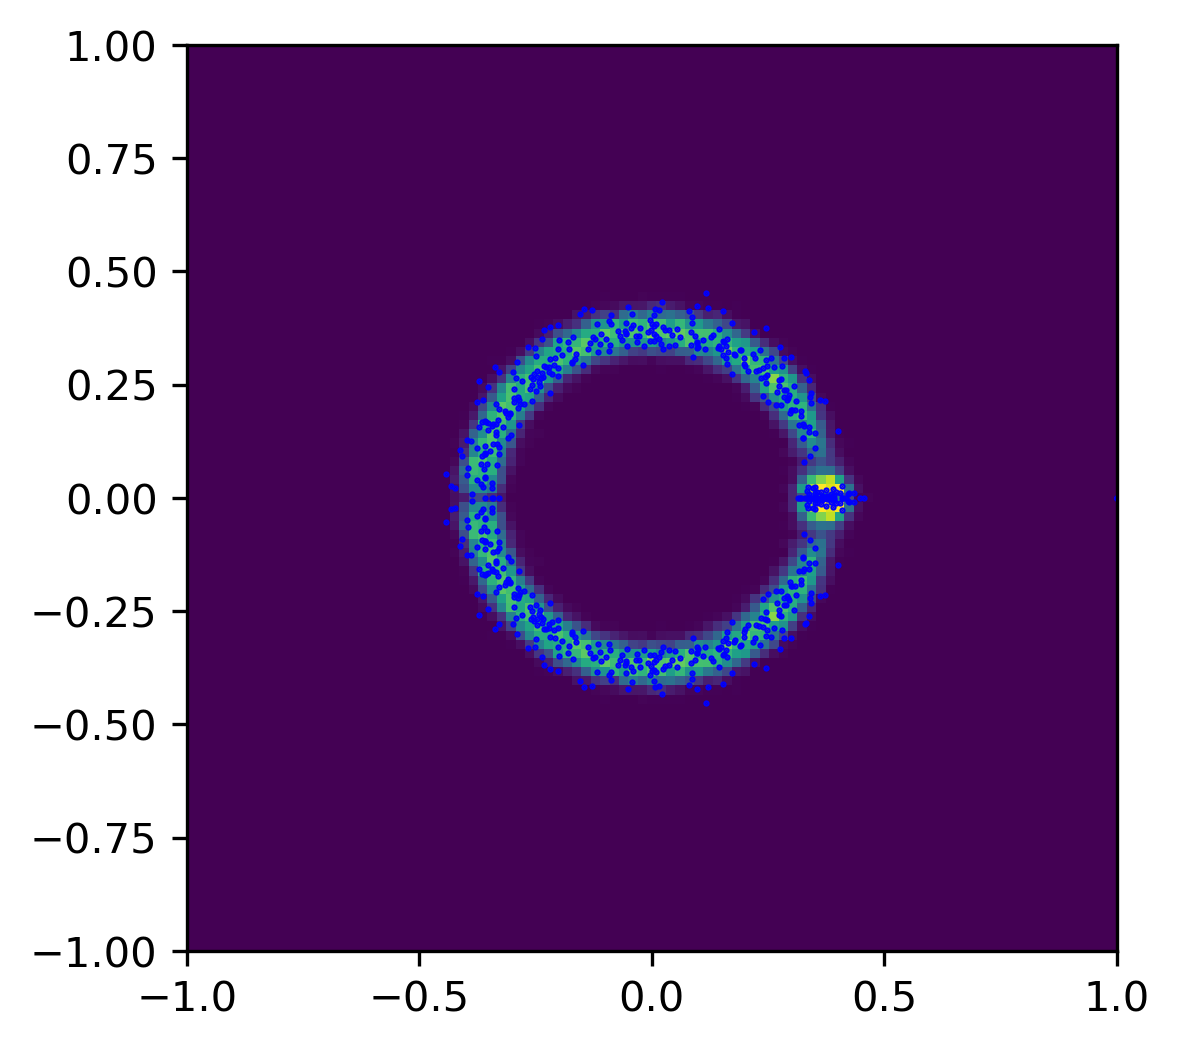

In [27]:
fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.hist2d(spectrum[:,0], spectrum[:,1], bins = np.linspace(-1, 1, 100))
for spectrum_ in spectrum_target_list3:
    plt.plot(spectrum_[:,0], spectrum_[:,1], "bo", markersize=0.5)
plt.show()

In [28]:
print(model_best_list4[0].channel.c, model_best_list4[0].channel.kraus_part.rank)

tf.Tensor(0.2469428304894527, shape=(), dtype=float64) 27


In [29]:
spectrum_list = []

for i in tqdm(range(1000)):
    diluted = DilutedKrausMap(U=generate_unitary(d), c=0.2469428304894527, kraus_part=KrausMap(d, rank=27))
    spectrum = channel_spectrum(diluted, use_coords=True, keep_real=False)
    spectrum_list.append(spectrum)

spectrum = np.real(np.concatenate(spectrum_list))

  0%|          | 0/1000 [00:00<?, ?it/s]

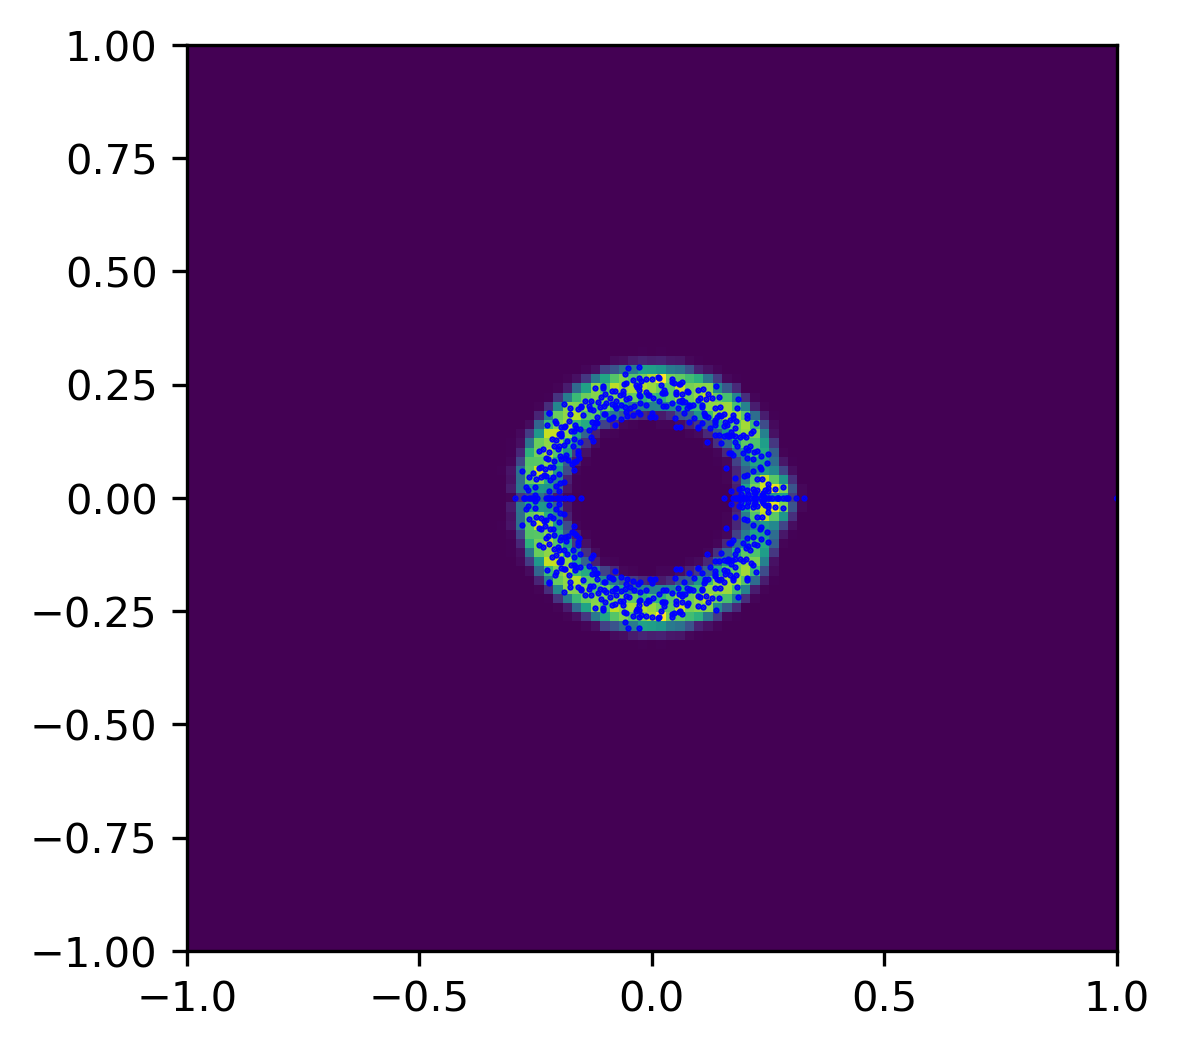

In [31]:
fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.hist2d(spectrum[:,0], spectrum[:,1], bins = np.linspace(-1, 1, 100))
for spectrum_ in spectrum_target_list4:
    plt.plot(spectrum_[:,0], spectrum_[:,1], "bo", markersize=0.5)
plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

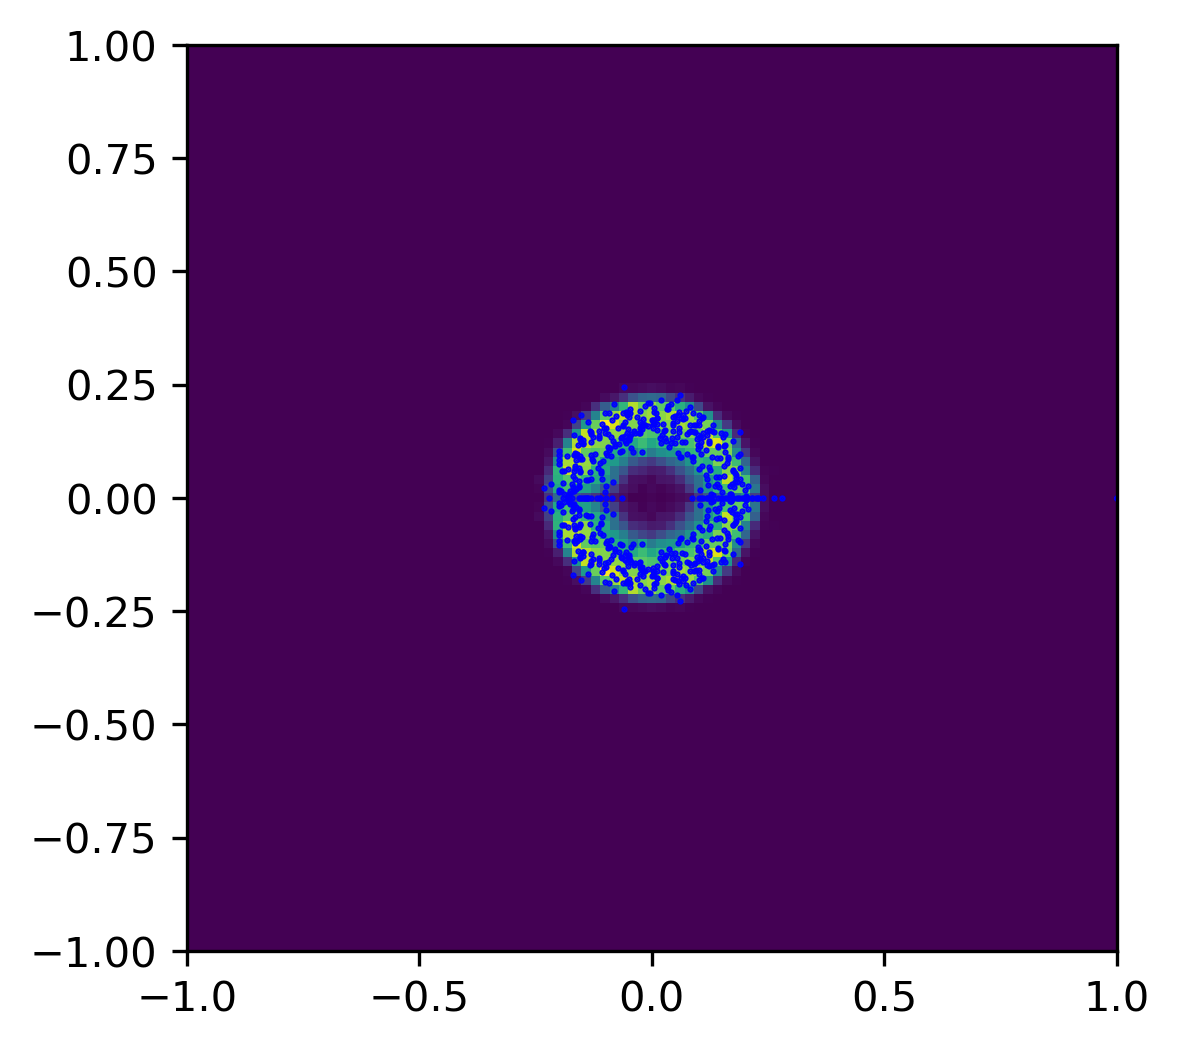

In [32]:
c = model_best_list5[0].channel.c
rank = model_best_list5[0].channel.kraus_part.rank

spectrum_list = []

for i in tqdm(range(1000)):
    diluted = DilutedKrausMap(U=generate_unitary(d), c=c, kraus_part=KrausMap(d, rank=rank))
    spectrum = channel_spectrum(diluted, use_coords=True, keep_real=False)
    spectrum_list.append(spectrum)

spectrum = np.real(np.concatenate(spectrum_list))

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.hist2d(spectrum[:,0], spectrum[:,1], bins = np.linspace(-1, 1, 100))
for spectrum_ in spectrum_target_list5:
    plt.plot(spectrum_[:,0], spectrum_[:,1], "bo", markersize=0.5)
plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

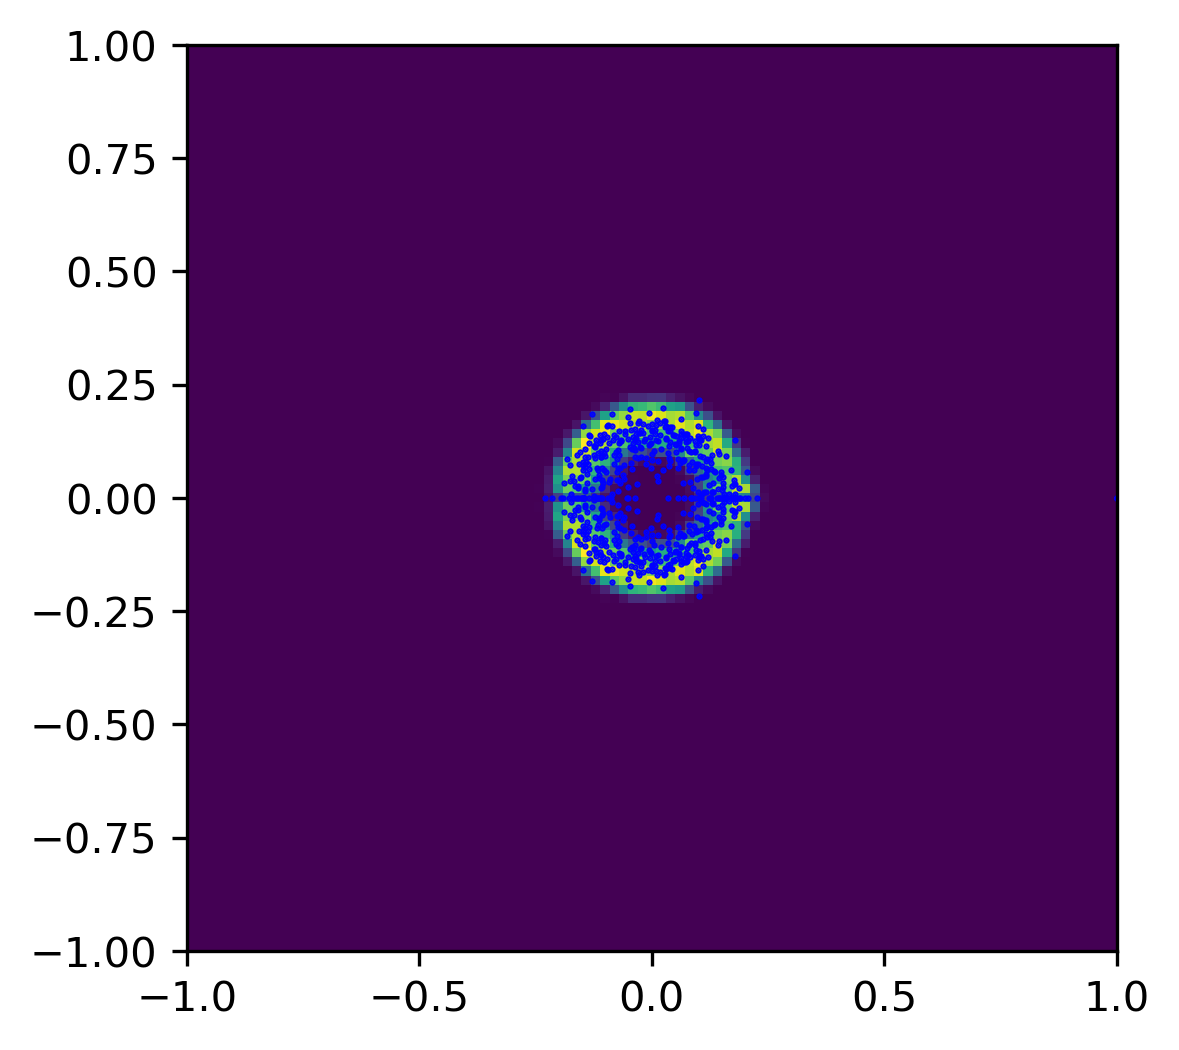

In [37]:
c = model_best_list6[0].channel.c
rank = model_best_list6[0].channel.kraus_part.rank

spectrum_list = []

for i in tqdm(range(1000)):
    diluted = DilutedKrausMap(U=generate_unitary(d), c=c, kraus_part=KrausMap(d, rank=rank))
    spectrum = channel_spectrum(diluted, use_coords=True, keep_real=False)
    spectrum_list.append(spectrum)

spectrum = np.real(np.concatenate(spectrum_list))

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.hist2d(spectrum[:,0], spectrum[:,1], bins = np.linspace(-1, 1, 100))
for spectrum_ in spectrum_target_list6:
    plt.plot(spectrum_[:,0], spectrum_[:,1], "bo", markersize=0.5)
plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

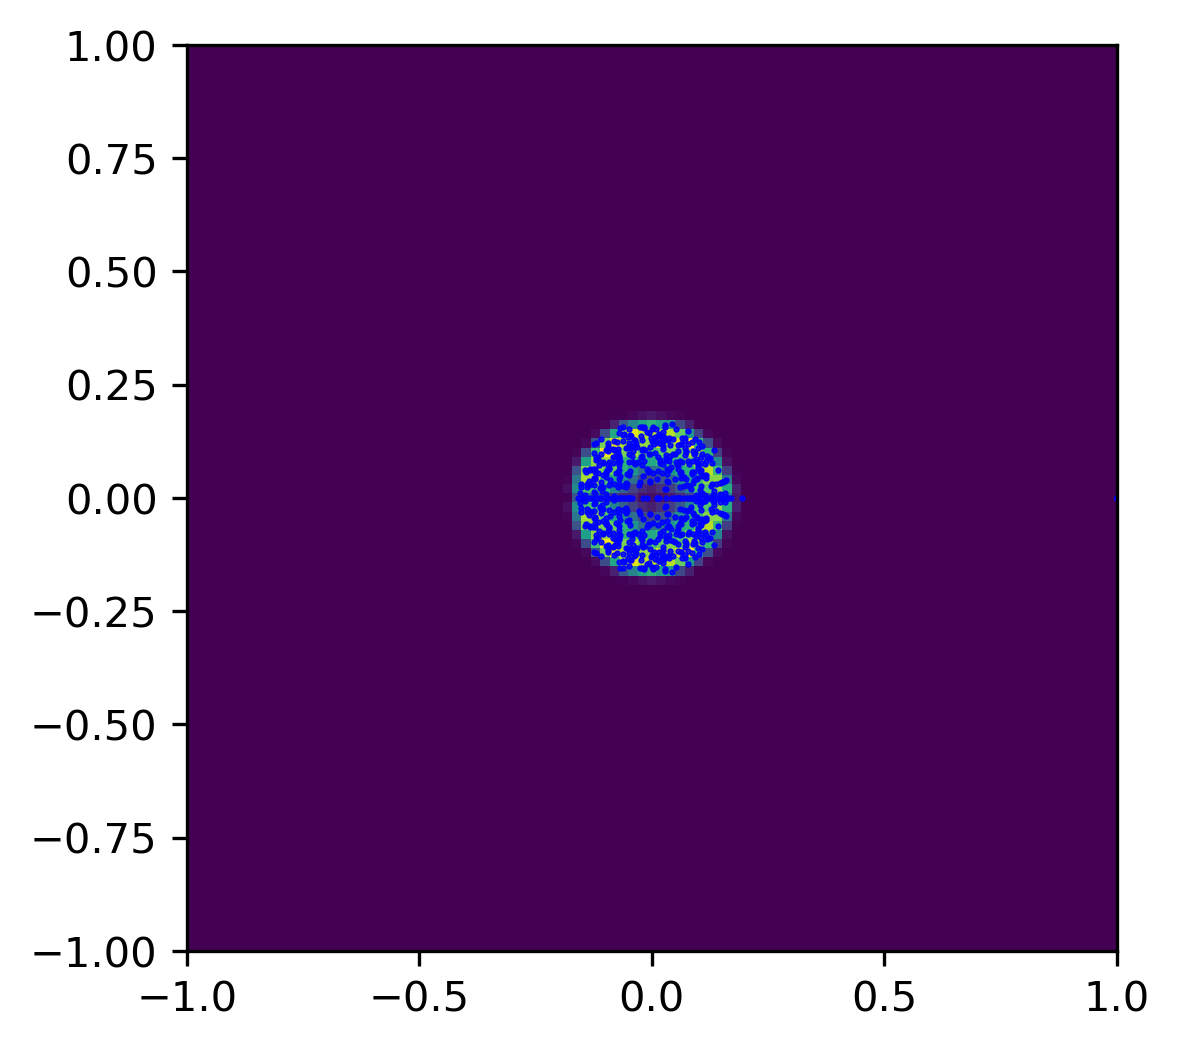

In [38]:
c = model_best_list7[0].channel.c
rank = model_best_list7[0].channel.kraus_part.rank

spectrum_list = []

for i in tqdm(range(1000)):
    diluted = DilutedKrausMap(U=generate_unitary(d), c=c, kraus_part=KrausMap(d, rank=rank))
    spectrum = channel_spectrum(diluted, use_coords=True, keep_real=False)
    spectrum_list.append(spectrum)

spectrum = np.real(np.concatenate(spectrum_list))

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.hist2d(spectrum[:,0], spectrum[:,1], bins = np.linspace(-1, 1, 100))
for spectrum_ in spectrum_target_list7:
    plt.plot(spectrum_[:,0], spectrum_[:,1], "bo", markersize=0.5)
plt.show()

## Four Qubits

In [4]:
[model1, model2, model3, model4, model5] = loader(data_path("belem_4qubit_repeated.model"))

spectrum1 = channel_spectrum(model1.channel, use_coords=True, keep_real=False)
spectrum2 = channel_spectrum(model2.channel, use_coords=True, keep_real=False) 
spectrum3 = channel_spectrum(model3.channel, use_coords=True, keep_real=False)
spectrum4 = channel_spectrum(model4.channel, use_coords=True, keep_real=False)
spectrum5 = channel_spectrum(model5.channel, use_coords=True, keep_real=False)

In [5]:
n = 4
d = 2**n

rank_grid = np.arange(8, 11)

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
U = tf.cast(Operator(random_unitary(d).data), dtype=precision)
distance_best, model_best = optimize_annulus_distance(spectrum1, U, rank_grid)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.08600489164413189 None
0.024804599230282068 None
0.024595133658834083 None
0.028622137543561944 None
0.0287881115835765 None
0.02584006668719141 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.08373255380836753 None
0.025840297533223984 None
0.021948208707364195 None
0.022751749170682727 None
0.022188533826799882 None
0.0222486145421751 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.08326577648838719 None
0.021189401223754404 None
0.024855162942603336 None
0.024918534924607556 None
0.020994909028617243 None
0.025212998219739154 None


tf.Tensor(0.4307751801759259, shape=(), dtype=float64) 9


  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\krist\anaconda3\envs\env_qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


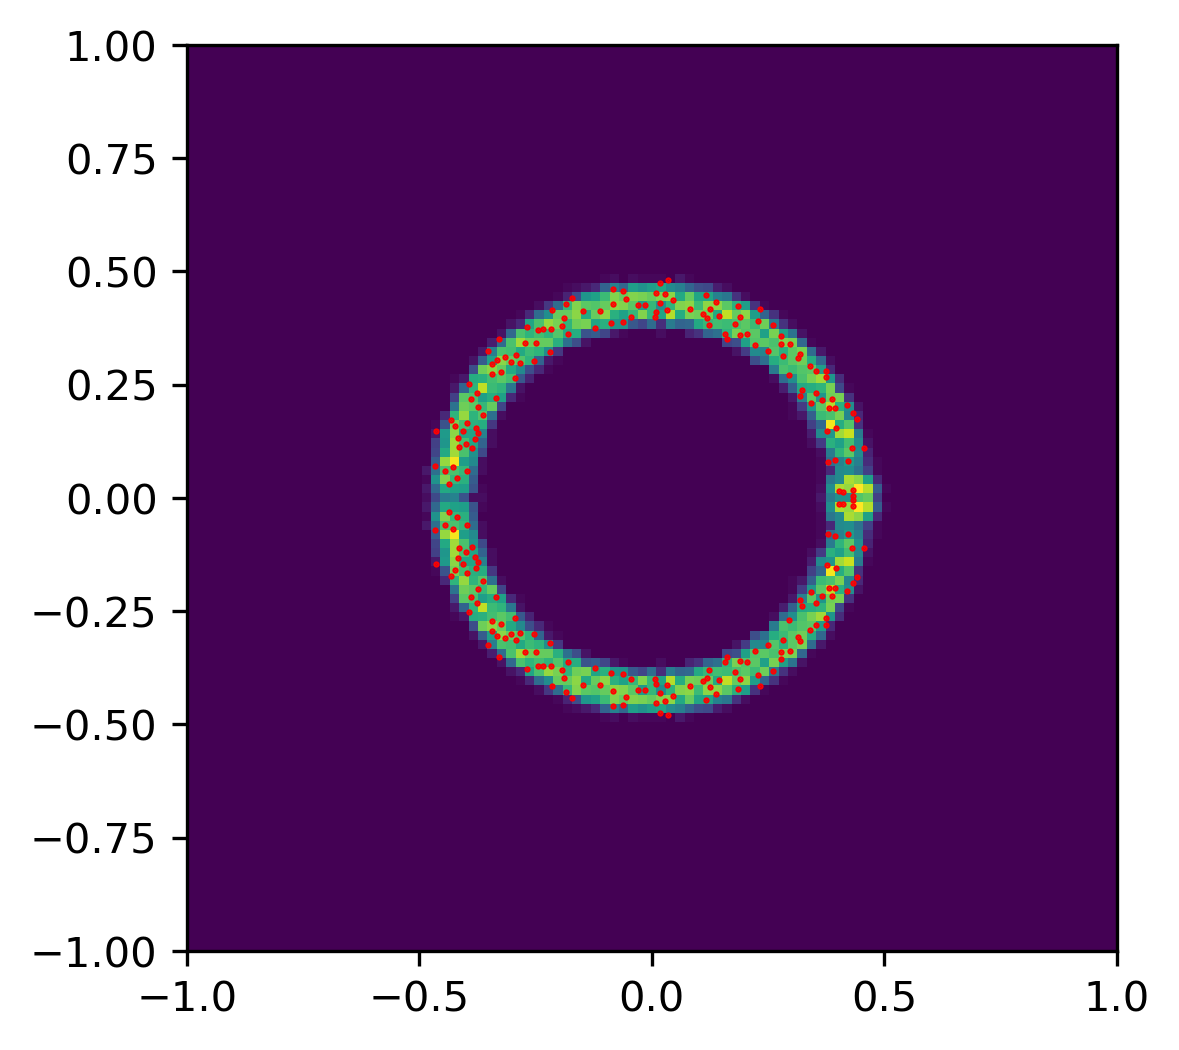

In [6]:
c = model_best.channel.c
rank = model_best.channel.kraus_part.rank
print(c, rank)
spectrum_list = []

for i in tqdm(range(100)):
    U = tf.cast(Operator(random_unitary(d).data), dtype=precision)
    diluted = DilutedKrausMap(U=U, c=c, kraus_part=KrausMap(d, rank=rank))
    spectrum = channel_spectrum(diluted, use_coords=True, keep_real=False)
    spectrum_list.append(spectrum)

spectrum = np.real(np.concatenate(spectrum_list))

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.hist2d(spectrum[:,0], spectrum[:,1], bins = np.linspace(-1, 1, 100))
plt.plot(spectrum1[:,0], spectrum1[:,1], "ro", markersize=0.5)
plt.show()

In [14]:
n = 4
d = 2**n

rank_grid = np.arange(50, 80, 10)

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
U = tf.cast(Operator(random_unitary(d).data), dtype=precision)
distance_best, model_best = optimize_annulus_distance(spectrum4, U, rank_grid)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.4088218666709118 None
0.20206418795355624 None
0.09334149227577132 None
0.06296902123073685 None
0.051251770728200106 None
0.058143917141411046 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.4085640250198402 None
0.2004326799249838 None
0.09128587614236457 None
0.05741106953133503 None
0.05358584535814646 None
0.05746447375656355 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.4089498117197646 None
0.20067477505470266 None
0.08920279041892847 None
0.05240906016984666 None
0.051127647575668976 None
0.04717401130685926 None


tf.Tensor(0.09838013176878789, shape=(), dtype=float64) 70


  0%|          | 0/100 [00:00<?, ?it/s]

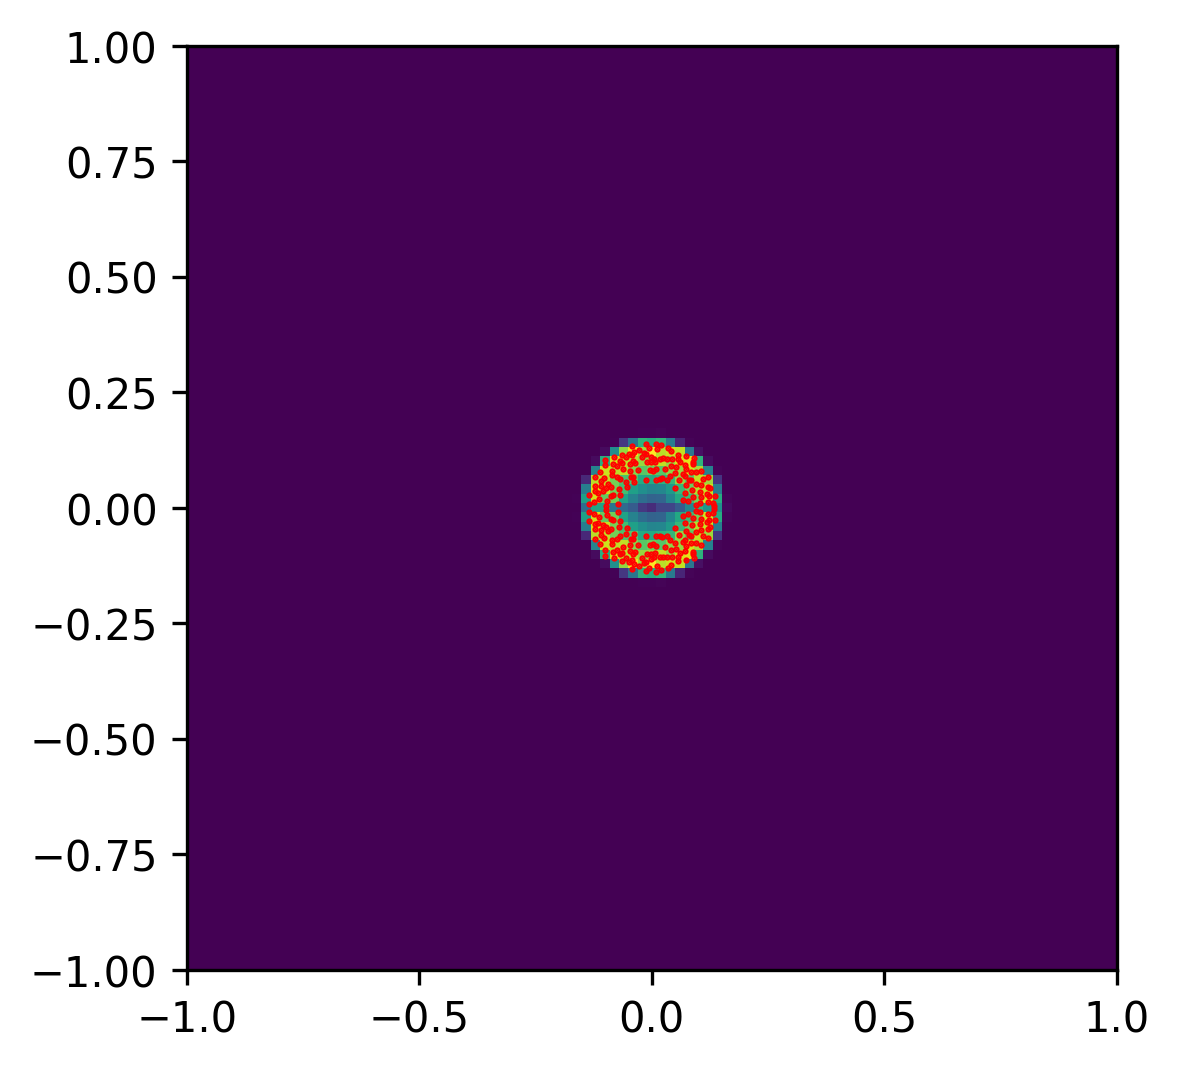

In [16]:
c = model_best.channel.c
rank = model_best.channel.kraus_part.rank
print(c, rank)

spectrum_list = []

for i in tqdm(range(100)):
    U = tf.cast(Operator(random_unitary(d).data), dtype=precision)
    diluted = DilutedKrausMap(U=U, c=c, kraus_part=KrausMap(d, rank=rank))
    spectrum = channel_spectrum(diluted, use_coords=True, keep_real=False)
    spectrum_list.append(spectrum)

spectrum = np.real(np.concatenate(spectrum_list))

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.hist2d(spectrum[:,0], spectrum[:,1], bins = np.linspace(-1, 1, 100))
plt.plot(spectrum4[:,0], spectrum4[:,1], "ro", markersize=0.5)
plt.show()